# Neural Network Deep Dive

We will first demonstrate how neural networks work using the Numpy module.

In [7]:
import numpy as np
import matplotlib.pyplot as plt 

import os
import sys
module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from utils import hello_world
hello_world()

Hello World!


In [2]:
def nonlin(x,deriv=False):
    if(deriv==True):
        return x*(1-x)
    return 1/(1+np.exp(-x))


class SGDNN():
    def __init__(self,
                 hiddenSize_,
                 inputSize_=2,
                 outputSize_=3,
                 giveSeed_=False,
                 seed = 1):
        sizeHidden = 20
        if giveSeed_:
            np.random.seed(seed)
        self.syn0 = (2*np.random.random((inputSize_,sizeHidden)) - 1) / np.sqrt(hiddenSize_)
        
        self.syn1 = (2*np.random.random((sizeHidden,outputSize_)) - 1)/np.sqrt(hiddenSize_)
    
    
    def testPoint(self, X):
        l0 = X
        l1 = nonlin(np.dot(l0, self.syn0))
        l2 = nonlin(np.dot(l1, self.syn1))
        return l2
    
    def trainingAlgorithm(self, Data):
        """
        
        """
        All = Data
        for j in range(10000):
            if (j % 100) == 0:
                np.random.shuffle(All)
            A = All
            A = np.split(A, 50)
            for a in A:
                l0 = a[:,0:2]
                l1 = nonlin(np.dot(l0,self.syn0))
                l2 = nonlin(np.dot(l1,self.syn1))

                l2_error = a[:,2:5] - l2

                l2_delta = l2_error*nonlin(l2,deriv=True)

                l1_error = l2_delta.dot(self.syn1.T)

                l1_delta = l1_error * nonlin(l1,deriv=True)

                self.syn1 += 0.1*l1.T.dot(l2_delta)
                self.syn0 += 0.1*l0.T.dot(l1_delta)
            
            # Checking Results every 1000 Epochs
            if (j % 1000 ) == 0:
                l0 = All[:,0:2]
                l1 = nonlin(np.dot(l0, self.syn0))
                l2 = nonlin(np.dot(l1, self.syn1))
                L2_Error = All[:,2:5] - l2
                print("Error: " + str(np.mean(np.abs(L2_Error))))

# Generate Data

To Test the results we create three separate data samples,
each in two dimensions.


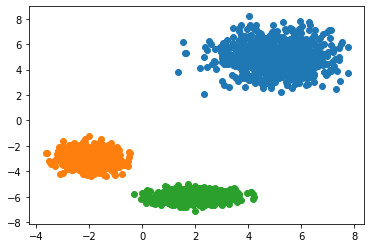

In [8]:

D1 = np.random.normal((5,5),(1,1),(1000,2))
D2 = np.random.normal((-2,-3),(.5,.5),(1000,2))
D3 = np.random.normal((2,-6),(.7,.3),(1000,2))


plt.figure()
plt.scatter(D1[:,0],D1[:,1])
plt.scatter(D2[:,0],D2[:,1])
plt.scatter(D3[:,0],D3[:,1])
plt.show()

In [9]:
Points = []
X = np.linspace(-5,5,100)
Y = np.linspace(-8,8,100)    
for x in X:
    for y in Y:
        Points.append(np.array([x,y]))

Data = np.vstack([D1,D2,D3])

L1 = np.array([[1,0,0] for i in range(len(D1))])
L2 = np.array([[0,1,0] for i in range(len(D2))])
L3 = np.array([[0,0,1] for i in range(len(D3))])

Label = np.vstack([L1,L2,L3])

All = np.hstack([Data,Label])

Network = SGDNN(5)
Network.trainingAlgorithm(All)

Error: 0.03768218528652516
Error: 0.0007616995554146189
Error: 0.0005175826222387446
Error: 0.0004128067880203911
Error: 0.0003516533060927287
Error: 0.0003105613624779864
Error: 0.0002806718251146905
Error: 0.0002576428931954427
Error: 0.00023926471798678615
Error: 0.00022415997537791343


In [10]:
print("Testing")
print("[-2,-3]")
res = Network.testPoint(np.array([-2,-3]))
print(f"Result: {res}")

print("[5,5]")
res = Network.testPoint(np.array([5,5]))
print(f"Result: {res}")
Vals = []    
for p in Points:
    Vals.append(Network.testPoint(p))

f = open("trainedValues.csv",'w')
for i in range(len(Points)):
    Line = str(Points[i][0])+","+str(Points[i][1])+","+str(np.argmax(Vals[i])) +"\n"
    f.write(Line)
f.close()

Testing
[-2,-3]
Result: [1.27600355e-04 9.99996276e-01 1.74653761e-05]
[5,5]
Result: [9.99742793e-01 1.47180747e-04 2.05050433e-04]
